# Counting particles and Voids

In this notebook is explored how the ratio $N_{\textbf{RP}} : N_{\textbf{OP}}$ affects the void catalog.

All the calculations up to the date where performed on my laptop, the old

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! cp ../12_abacus_3N_random_particles/void_masterlist_N30000.cat ./
! cp ../11_abacus_2N_random_particles/void_masterlist_N20000.cat ./
! cp ../10_abacus_N_random_particles/void_masterlist_N10000.cat ./


In [2]:
! ls -lt

total 2884
-rw-rw-r-- 1 filipo filipo   71043 feb 22 11:44 Untitled.ipynb
-rw-rw-r-- 1 filipo filipo  278804 feb 20 16:29 void_masterlist_N10000.cat
-rw-rw-r-- 1 filipo filipo  910622 feb 20 16:29 void_masterlist_N20000.cat
-rw-rw-r-- 1 filipo filipo 1559595 feb 20 16:29 void_masterlist_N30000.cat
-rw-rw-r-- 1 filipo filipo  117913 feb 20 15:48 ol_reliable.jpg


In [3]:
cat_1N = np.loadtxt("void_masterlist_N10000.cat", delimiter=",")
cat_2N = np.loadtxt("void_masterlist_N20000.cat", delimiter=",")
cat_3N = np.loadtxt("void_masterlist_N30000.cat", delimiter=",")

# How many particles have each halo?

In [14]:
n_halos_cat1N = cat_1N[-1,0].astype(int)
n_halos_cat2N = cat_2N[-1,0].astype(int)
n_halos_cat3N = cat_3N[-1,0].astype(int)

N1 = 10000
N2 = 2*N1
N3 = 3*N1


print( n_halos_cat1N, n_halos_cat2N, n_halos_cat3N)


143 165 163
12


In [5]:
2 * 165 ** (1/3)

10.969613104865235

In [36]:
np.logspace(-4, 0, 11 )  

array([1.00000000e-04, 2.51188643e-04, 6.30957344e-04, 1.58489319e-03,
       3.98107171e-03, 1.00000000e-02, 2.51188643e-02, 6.30957344e-02,
       1.58489319e-01, 3.98107171e-01, 1.00000000e+00])

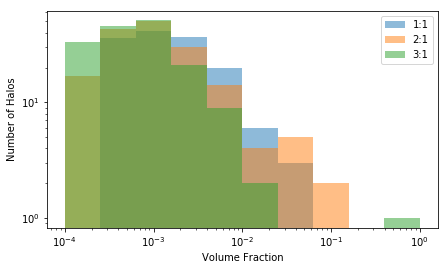

In [41]:
catalogs = [cat_1N, cat_2N, cat_3N]
n_halos_per_catalog = [n_halos_cat1N, n_halos_cat2N, n_halos_cat3N]
label_cat = ["1:1", "2:1", "3:1"]
N = [ N1, N2, N3]

fig = figure(figsize=(7,4))


hists = []


bins = np.logspace(-4, 0, 11 )  
for j in range(len(catalogs)):
    
    
    aux = [] # Counting particles per halo
    
    for i in range(n_halos_per_catalog[j] ):
        
        index = np.where( catalogs[j][:,0] == i)[0]
        aux.append(index.shape[0])
    
    aux = np.array(aux)/N[j]
        

    hists.append(hist(aux, alpha=0.5, label=label_cat[j], bins=bins, histtype="bar"))


    plt.ylabel("Number of Halos")
    plt.xlabel("Volume Fraction")
    plt.yscale('log')
    plt.xscale('log')

    plt.legend(loc=1)
    
    plt.savefig("volume_function.pdf", format="pdf")
    

In [42]:
histograms = [
hists[0][0],
hists[1][0],
hists[2][0]
]

In [46]:
histograms

[array([ 0., 36., 41., 37., 20.,  6.,  3.,  0.,  0.,  0.]),
 array([17., 43., 50., 30., 14.,  4.,  5.,  2.,  0.,  0.]),
 array([33., 46., 51., 21.,  9.,  2.,  0.,  0.,  0.,  1.])]

In [47]:
center_bins = []
for i in range( len(bins) -1):
    center_bins.append((log10(bins[i+1]) + log10(bins[i]))/2 )

In [48]:
histograms[histograms == 0 ] = np.nan

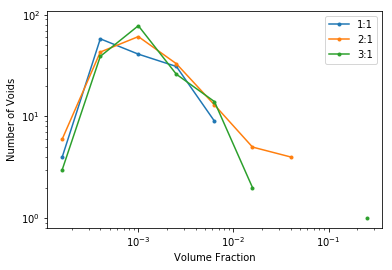

In [52]:

for i in range(3):
    plot( 10**np.array(center_bins), histograms2[i],  marker=".", label=label_cat[i])

plt.yscale("log")

plt.xlabel("Volume Fraction")
plt.ylabel("Number of Voids")

plt.xscale("log")
plt.ylim(0.8,110)
plt.legend(loc=1)

plt.savefig("volume_function_log.pdf", format="pdf")

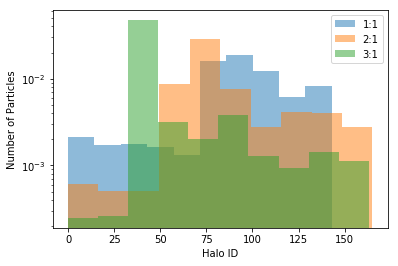

In [36]:
# Number of particles per halo

# Re-scaled to 1N, 2N and 3N

hist(cat_1N[:,0], alpha=0.5, label="1:1", density=N1)
hist(cat_2N[:,0], alpha=0.5, label="2:1", density=N2)
hist(cat_3N[:,0], alpha=0.5, label="3:1", density=N3)

plt.legend(loc=1)
plt.ylabel("Number of Particles")
plt.xlabel("Halo ID")
plt.yscale("log")

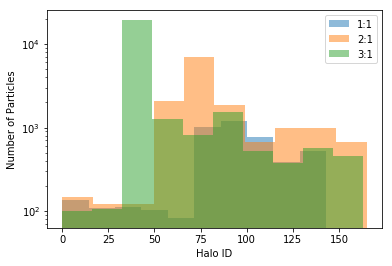

In [37]:
# Number of particles per halo

hist(cat_1N[:,0], alpha=0.5, label="1:1")
hist(cat_2N[:,0], alpha=0.5, label="2:1")
hist(cat_3N[:,0], alpha=0.5, label="3:1")

plt.legend(loc=1)
plt.ylabel("Number of Particles")
plt.xlabel("Halo ID")
plt.yscale("log")

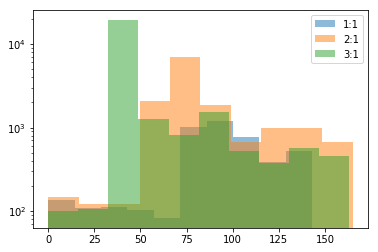

In [30]:
n = hist(cat_1N[:,0], alpha=0.5, label="1:1")
m = hist(cat_2N[:,0], alpha=0.5, label="2:1")
o = hist(cat_3N[:,0], alpha=0.5, label="3:1")
yscale("log")
plt.legend(loc=1)

In [52]:
n

(array([  101.,   106., 19206.,  1273.,   813.,  1539.,   520.,   380.,
          577.,   452.]),
 array([  0. ,  16.3,  32.6,  48.9,  65.2,  81.5,  97.8, 114.1, 130.4,
        146.7, 163. ]),
 <a list of 10 Patch objects>)